In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [65]:
df = pd.read_csv(r'C:\Users\şerefcanmemiş\Downloads\openings.csv')


In [66]:
# selecting which columns we are going to use
columns = ['Opening', 'Colour', 'Num Games','Perf Rating', 'Avg Player','Player Win %', 'Draw %','Opponent Win %']
df = df[columns]
df['Performance'] = df['Perf Rating']-df['Avg Player']
df.head()

,Opening,Colour,Num Games,Perf Rating,Avg Player,Player Win %,Draw %,Opponent Win %,Performance
0,"Alekhine Defense, Balogh Variation",white,692,2247,2225,40.8,24.3,35.0,22
1,"Alekhine Defense, Brooklyn Variation",black,228,2145,2193,29.8,22.4,47.8,-48
2,"Alekhine Defense, Exchange Variation",white,6485,2244,2194,40.8,27.7,31.5,50
3,"Alekhine Defense, Four Pawns Attack",white,881,2187,2130,39.7,23.2,37.1,57
4,"Alekhine Defense, Four Pawns Attack, Fianchett...",black,259,2122,2178,37.8,21.2,40.9,-56


In [72]:
def abbreviate(names):
    abbreviations = []
    for name in names:
        name = str(name)
        words = name.split()
        first_chars = [word[0] for word in words]
        abbreviation = ''.join(first_chars)
        abbreviations.append(abbreviation)
    return abbreviations

In [93]:
win_white = df.sort_values(by='Player Win %',ascending =False).head(4)[['Opening','Player Win %']]
win_black = df.sort_values(by='Opponent Win %',ascending= False).head(4)[['Opening','Opponent Win %']]
draw = df.sort_values(by='Draw %',ascending = False).head(4)[['Opening','Draw %']]

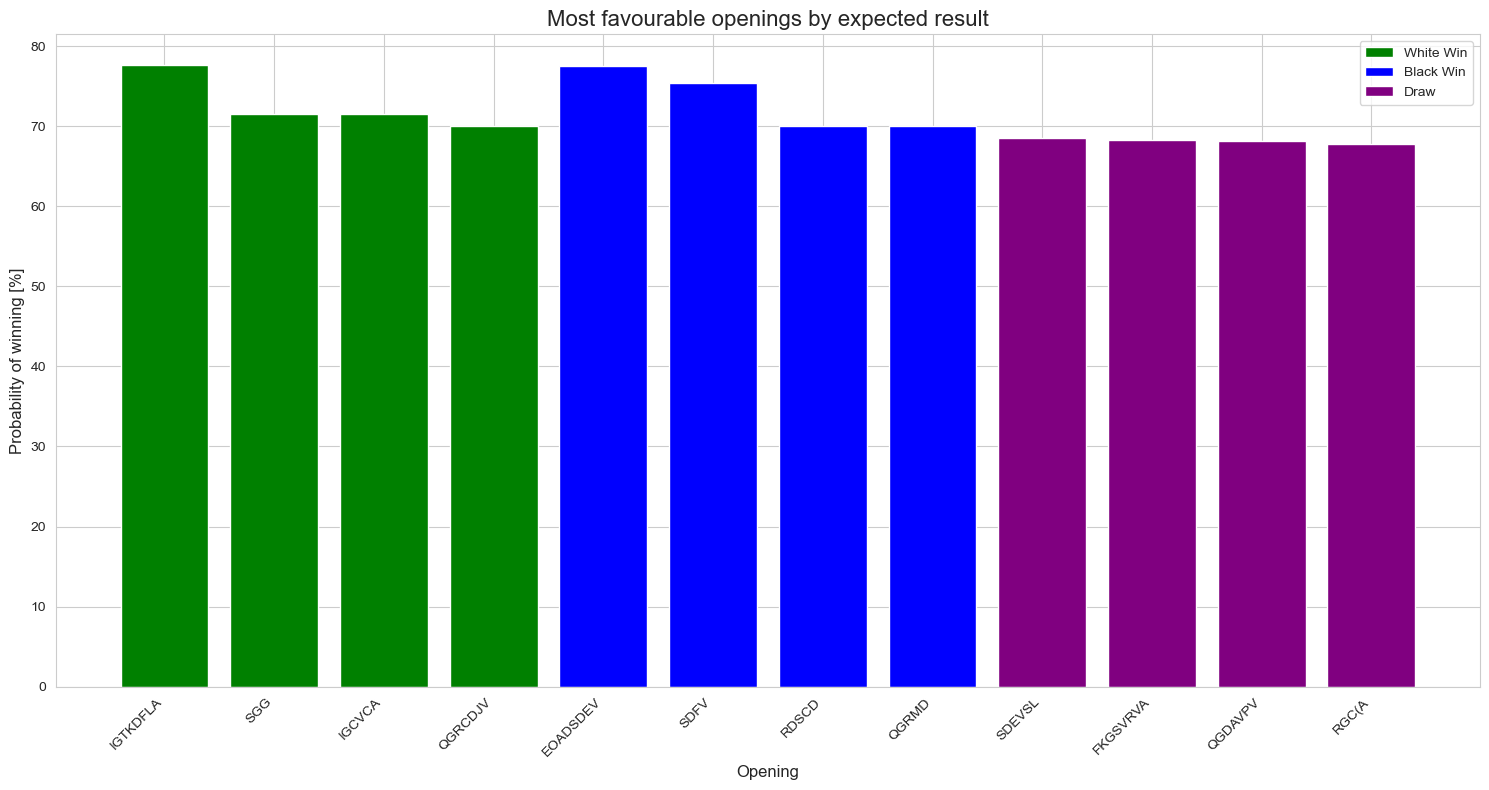

Abbreviations: 
IGTKDFLA - Italian Game, Two Knights Defense, Fried Liver Attack
SGG - Scotch Game, General
IGCVCA - Italian Game, Classical Variation, Center Atttack
QGRCDJV - Queen's Gambit Refused, Chigorin Defense, Janowski Variation
EOADSDEV - English Opening, Anglo-Indian Defense, Scandavian Defense, Exchange Variation
SDFV - Sicilian Defense, Franco-Scilian Variation
RDSCD - Rat Defense, Small Center Defense
QGRMD - Queen's Gambit Refused, Marshall Defense
SDEVSL - Slav Defense, Exchange Variation, Symmetrical Line
FKGSVRVA - Four Knights Game, Spanish Variation, Rubinstein Variation, Accepted
QGDAVPV - Queen's Gambit Declined, Anti-Tartakower Variation, Petrosian Variation
RGC(A - Russian Game, Cozio (Lasker) Attack


In [133]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.bar(x=abbreviate(win_white['Opening']),height= win_white['Player Win %'],color='green',label='White Win')
plt.bar(x=abbreviate(win_black['Opening']),height= win_black['Opponent Win %'],color='blue',label='Black Win')
plt.bar(x=abbreviate(draw['Opening']),height= draw['Draw %'],color='purple',label='Draw')
plt.xlabel('Opening', fontsize=12)
plt.ylabel('Probability of winning [%]', fontsize=12)
plt.title('Most favourable openings by expected result', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

# explain abbreviation
names = win_white['Opening'].tolist() + win_black['Opening'].tolist() + draw['Opening'].tolist()
abbreviations = abbreviate(names)
print('Abbreviations: ')
for abbreviation, name in zip(abbreviations,names):
    print(f'{abbreviation} - {name}')

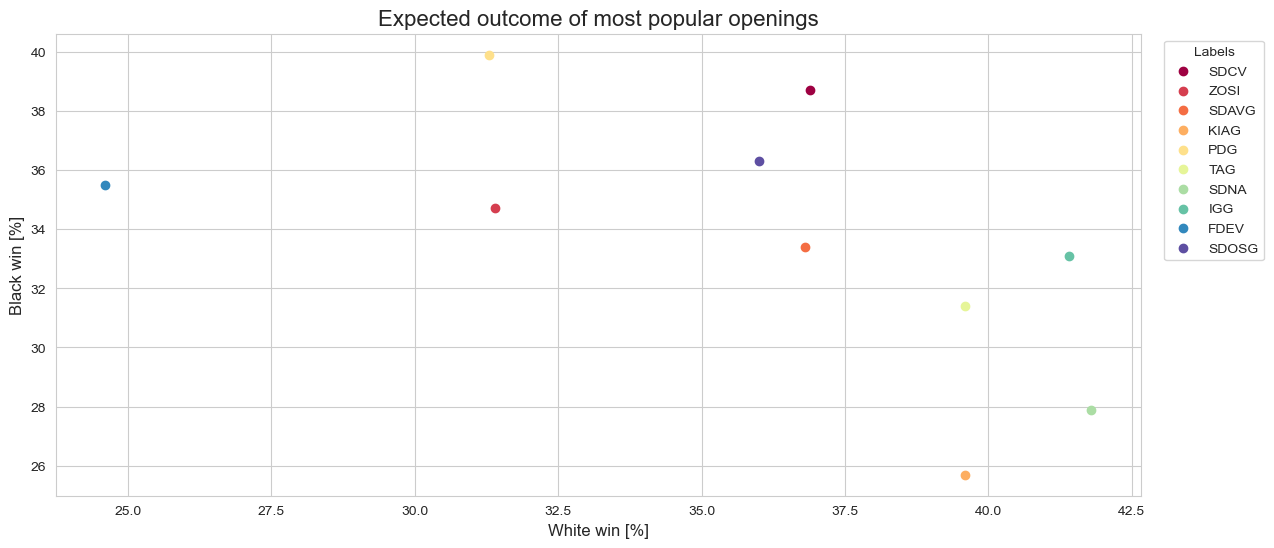

Sicilian Defense, Closed Variation - SDCV
Zukertort Opening, Sicilian Invitation - ZOSI
Sicilian Defense, Alapin Variation, General - SDAVG
King's Indian Attack, General - KIAG
Pirc Defense, General - PDG
Trompowsky Attack, General - TAG
Sicilian Defense, Nyezhmetdinov-Rossolimo Attack - SDNA
Indian Game, General - IGG
French Defense, Exchange Variation - FDEV
Sicilian Defense, Old Sicilian, General - SDOSG


In [132]:
most_popular = df.sort_values(by= 'Num Games', ascending = False).head(10)
pallet_10 = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
for i, (x_val, y_val) in enumerate(zip(most_popular['Player Win %'],most_popular['Opponent Win %'])):
    plt.scatter(x_val,y_val,color= pallet_10[i], label= abbreviate(most_popular['Opening'])[i])
    
plt.xlabel('White win [%]', fontsize=12)
plt.ylabel('Black win [%]', fontsize=12)
plt.title('Expected outcome of most popular openings', fontsize=16)
plt.legend(title='Labels', bbox_to_anchor=(1.12, 1), loc='upper right')
plt.show()

# explain abbreviation
names = most_popular['Opening']
abbreviations = abbreviate(names)
for name, abbr in zip(names,abbreviations):
    print(f'{name} - {abbr}')

In [121]:
most_popular

,Opening,Num Games
1404,"Sicilian Defense, Closed Variation",22482
1879,"Zukertort Opening, Sicilian Invitation",20045
1380,"Sicilian Defense, Alapin Variation, General",19885
691,"King's Indian Attack, General",19835
994,"Pirc Defense, General",18659
...,...,...
1378,"Sicilian Defense, Alapin Variation, Barmen Def...",101
96,"Bishop's Opening, Urusov Gambit",101
1398,"Sicilian Defense, Classical Variation, Dragon ...",100
928,"Nimzowitsch Defense, Kennedy Variation, Main Line",100
